In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

##  load data

In [2]:
df_2013 = pd.read_csv('2013_final/senate_2013.csv') #2013 winners

In [3]:
df_nom = pd.read_csv('nominations_data/senate_nom.csv') # Primary candidates vying for nominations

In [4]:
df_cand = pd.read_csv('candidates_data/senate_2017.csv') #Party candidate / Independent

In [5]:
df_2017 = pd.read_csv('2017_final/senate_2017.csv') # 2017 winners

## Clean 2013 Data

In [6]:
df_2013.head(2)

,County Code,Unnamed: 1,Unnamed: 2,Unnamed: 3,County Name,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Full Names B,Unnamed: 18,Unnamed: 19,Party/Independent Candidate
0,1,NaN,NaN,NaN,Mombasa,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Hassan,NaN,NaN,Wiper Democratic Movement- Kenya
1,2,NaN,NaN,NaN,Kwale,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Boy,NaN,NaN,Orange Democratic Movement


In [7]:
df_2013.dropna(axis=1,inplace=True)

### join first and last names

In [8]:
df_2013['name'] = df_2013[['Full Names A','Full Names B']].apply(lambda x: ' '.join(x), axis=1).str.lower()

In [9]:
df_2013 = df_2013[['County Code','County Name','name', 'Party/Independent Candidate']]

In [10]:
df_2013.columns = ['c_code','county','name','party']

In [11]:
df_2013.head(3)

,c_code,county,name,party
0,1,Mombasa,hassan omar hassan,Wiper Democratic Movement- Kenya
1,2,Kwale,boy juma boy,Orange Democratic Movement
2,3,Kilifi,stewart mwachiru shadrack madzayo,Orange Democratic Movement


In [12]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
c_code    47 non-null int64
county    47 non-null object
name      47 non-null object
party     47 non-null object
dtypes: int64(1), object(3)
memory usage: 1.5+ KB


## Clean 2017 Data

In [13]:
df_2017.head(2)

,c_code,county,name,gender,birth_date,party_name,elected
0,30,Baringo,Gideon Kipsielei Towett Moi,Male,NaN,Kenya African National Union,True
1,36,Bomet,Christopher Andrew Langat,Male,NaN,Jubilee Party,True


In [14]:
df_2017.columns = ['c_code','county','name','gender', 'dob', 'party','elected']

In [15]:
df_2017['name'] = df_2017['name'].str.lower()

In [16]:
df_2017.head(2)

,c_code,county,name,gender,dob,party,elected
0,30,Baringo,gideon kipsielei towett moi,Male,NaN,Kenya African National Union,True
1,36,Bomet,christopher andrew langat,Male,NaN,Jubilee Party,True


In [17]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
c_code     47 non-null int64
county     47 non-null object
name       47 non-null object
gender     47 non-null object
dob        8 non-null object
party      47 non-null object
elected    47 non-null bool
dtypes: bool(1), int64(1), object(5)
memory usage: 2.3+ KB


## Clean Nomination 2017 Data

In [18]:
df_nom.head(3)

,County Code,County Name,Surname,Other Name,ID. No.,YOB,PWD,Gender,Party,Party_abv
0,1,Mombasa,Kassim,Abdusalaam Ali,10093749,1/1/1970,No,Male,JUBILEE PARTY,JP
1,1,Mombasa,Swabir,Abuubakar Mahadhi,30474451,8/13/1992,No,Male,JUBILEE PARTY,JP
2,1,Mombasa,Katana,Hazel Nyamoki,6729577,4/1/1959,No,Female,JUBILEE PARTY,JP


In [19]:
df_nom['name'] = df_nom[['Other Name','Surname']].apply(lambda x: ' '.join(x), axis=1).str.lower()
df_nom['County Name'] = df_nom['County Name'].str.lower()
df_nom['Gender'] = df_nom['Gender'].str.lower()

In [20]:
df_nom = df_nom.drop(['Surname','Other Name'],axis=1)

In [21]:
df_nom.head(2)

,County Code,County Name,ID. No.,YOB,PWD,Gender,Party,Party_abv,name
0,1,mombasa,10093749,1/1/1970,No,male,JUBILEE PARTY,JP,abdusalaam ali kassim
1,1,mombasa,30474451,8/13/1992,No,male,JUBILEE PARTY,JP,abuubakar mahadhi swabir


In [22]:
df_nom.columns = ['c_code','county','id_no','yob','pwd','gender','party','party_abv','name']

In [23]:
df_nom = df_nom[['c_code','county','name','id_no','yob','pwd','gender','party_abv']]

In [24]:
df_nom.head(3)

,c_code,county,name,id_no,yob,pwd,gender,party_abv
0,1,mombasa,abdusalaam ali kassim,10093749,1/1/1970,No,male,JP
1,1,mombasa,abuubakar mahadhi swabir,30474451,8/13/1992,No,male,JP
2,1,mombasa,hazel nyamoki katana,6729577,4/1/1959,No,female,JP


In [25]:
df_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 8 columns):
c_code       236 non-null int64
county       236 non-null object
name         236 non-null object
id_no        233 non-null object
yob          172 non-null object
pwd          169 non-null object
gender       235 non-null object
party_abv    236 non-null object
dtypes: int64(1), object(7)
memory usage: 14.8+ KB


## Clean Candidates 2017 Data

In [26]:
df_cand.head(3)

,No,Surname,Other Names,County Code,County Name,Party Code,Political Party Name,Abbrv,Gender
0,1,BAJABER,YASSER ALI SHEIKH,1,MOMBASA,23,FORUM FOR RESTORATION OF DEMOCRACY-KENYA,FORD-KENYA,Male
1,2,CHOME,ONESMAS HABEL,1,MOMBASA,42,SHIRIKISHO PARTY OF KENYA,SPK,Male
2,3,FONDO,FLORENCE WAWUDA,1,MOMBASA,60,VIBRANT DEMOCRATIC PARTY,VDP,Female


In [27]:
df_cand['name'] = df_cand[['Other Names','Surname']].apply(lambda x: ' '.join(x), axis=1).str.lower()
df_cand['County Name'] = df_cand['County Name'].str.lower()
df_cand['Gender'] = df_cand['Gender'].str.lower()

In [28]:
df_cand = df_cand.drop(['Surname','Other Names'],axis=1)

In [29]:
df_cand = df_cand[['County Code', 'County Name', 'name','Gender','Abbrv']]

In [30]:
df_cand.columns = ['c_code','county','name','gender','party_abv']

In [31]:
df_cand.head(3)

,c_code,county,name,gender,party_abv
0,1,mombasa,yasser ali sheikh bajaber,male,FORD-KENYA
1,1,mombasa,onesmas habel chome,male,SPK
2,1,mombasa,florence wawuda fondo,female,VDP


In [32]:
df_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 5 columns):
c_code       257 non-null int64
county       257 non-null object
name         257 non-null object
gender       257 non-null object
party_abv    257 non-null object
dtypes: int64(1), object(4)
memory usage: 10.1+ KB


###  Merge the details from all the dataset

In [33]:
df_2013.columns

Index(['c_code', 'county', 'name', 'party'], dtype='object')

In [34]:
df_2017.columns

Index(['c_code', 'county', 'name', 'gender', 'dob', 'party', 'elected'], dtype='object')

In [35]:
df_nom.columns

Index(['c_code', 'county', 'name', 'id_no', 'yob', 'pwd', 'gender',
       'party_abv'],
      dtype='object')

In [36]:
df_cand.columns

Index(['c_code', 'county', 'name', 'gender', 'party_abv'], dtype='object')

**Projected steps**
- concat nominations and final candidates datasets
- add column `2013` with a yes(1) or No(0) to this dataset
- add `won` column with yes(1) or No(0)

### i. concat nominations and final candidates datasets

In [113]:
candidates = pd.merge(df_nom,df_cand,how='outer')

In [114]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 8 columns):
c_code       444 non-null int64
county       444 non-null object
name         444 non-null object
id_no        233 non-null object
yob          172 non-null object
pwd          169 non-null object
gender       443 non-null object
party_abv    444 non-null object
dtypes: int64(1), object(7)
memory usage: 31.2+ KB


**fill `age` with mean `yob` **

In [115]:
candidates['age'] = 2017 - (candidates['yob'].str.split('/').str.get(2).apply(pd.to_numeric))

In [116]:
candidates['age'] = candidates['age'].fillna(candidates['age'].mean()).round(0).astype(int)

In [117]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 443
Data columns (total 9 columns):
c_code       444 non-null int64
county       444 non-null object
name         444 non-null object
id_no        233 non-null object
yob          172 non-null object
pwd          169 non-null object
gender       443 non-null object
party_abv    444 non-null object
age          444 non-null int64
dtypes: int64(2), object(7)
memory usage: 34.7+ KB


#### a simple heatmap to see where we are missing data!

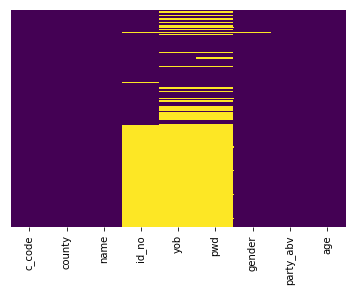

In [118]:
sns.heatmap(candidates.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Indicate those who won in_2013 with a `True-(1)` or `False-(0)` to this dataset

- create a List object with all the names of senators from 2013
- apply function to each candidates profile, if yes - 1,  no-0 to a `in_2013` column

In [119]:
sen_2013 = list(df_2013['name'])

In [120]:
def check_2013(name):
    if name in sen_2013:
        return 1
    else:
        return 0

In [121]:
candidates['won_2013'] = candidates['name'].apply(check_2013)

### Indicate 2017 winners with a yes-(1) or no-(0) in `elected` column

In [122]:
sen_2017 = list(df_2017['name'])

In [123]:
def won2017(name):
    if name in sen_2017:
        return 1
    else:
        return 0

In [124]:
candidates['elected'] = candidates['name'].apply(won2017)

In [125]:
candidates['party_abv'].unique()

array(['JP', 'ODM', 'WDM-K', 'ANC', 'NARC-KENYA', 'CCM', 'FORD-KENYA',
       'SPK', 'VDP', 'IND', 'MCCP', 'ALPK', 'ELP', 'KADU-ASILI', 'KANU',
       'DP', 'CMD', 'UDP', 'NVP', 'PDR', 'KPP', 'SAFINA', 'AGANO', 'SDP',
       'TAK', 'JFP', 'EFP', 'LPK', 'FAP', 'PNU', 'MGPK', 'FORD', 'CCU',
       'PTP', 'ND', 'MDP', 'NLP', 'FPK', 'PPOK', 'MDG', 'RBK', 'UDM',
       'KNC', 'PEP', 'PDP', 'KSC', 'RLP'], dtype=object)

In [126]:
candidates['pwd'].value_counts()

No      156
None      6
ND        6
Yes       1
Name: pwd, dtype: int64

In [127]:
# from fuzzywuzzy import fuzz, process
# fuzz.ratio(df_2013['name'][0],candidates['name'][2])

In [129]:
# candidates.to_csv('senate_candidates.csv')

# EDA

load candidates data

In [130]:
df = pd.read_csv('senate_candidates.csv')

In [131]:
df.head(3)

,Unnamed: 0,c_code,county,name,id_no,yob,pwd,gender,party_abv,age,won_2013,elected
0,0,1,mombasa,abdusalaam ali kassim,10093749,1/1/1970,No,male,JP,47,0,0
1,1,1,mombasa,abuubakar mahadhi swabir,30474451,8/13/1992,No,male,JP,25,0,0
2,2,1,mombasa,hazel nyamoki katana,6729577,4/1/1959,No,female,JP,58,0,0


### Missing Data

Use a heatmap to see where we are missing data!

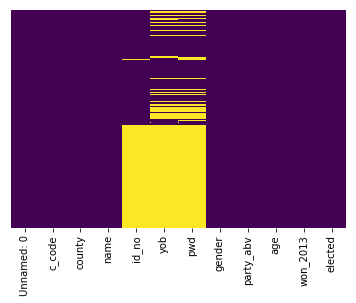

In [132]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# An assessment of data available, id_no, yob and pwd have missing values while the rest
# are relatively OK.
#

In [156]:
# drop column I wont use 
df.drop(['Unnamed: 0','id_no', 'yob','pwd'], axis=1, inplace=True)

# Visualizing some more of the data

#### Analysis by column. 

**By Elected**


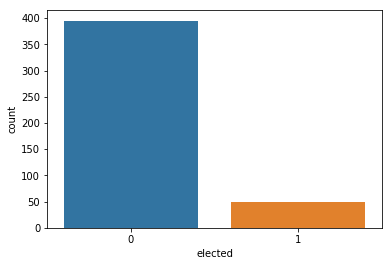

In [157]:
sns.countplot(x='elected',data=df)

**Elected by Gender**

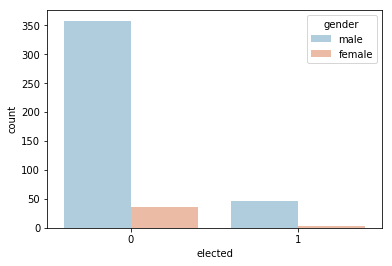

In [158]:
sns.countplot(x='elected',hue='gender',data=df,palette='RdBu_r')

#### Election by Party

top 10 parties by count

In [154]:
df['party_abv'].value_counts()[:10]

JP            173
ODM            75
IND            44
WDM-K          20
KANU           17
ANC            14
MCCP           12
FORD-KENYA     12
NARC-KENYA      8
CCM             5
Name: party_abv, dtype: int64

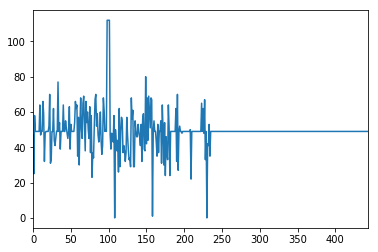

In [144]:
df['age'].plot()

In [159]:
df.head(3)

,c_code,county,name,gender,party_abv,age,won_2013,elected
0,1,mombasa,abdusalaam ali kassim,male,JP,47,0,0
1,1,mombasa,abuubakar mahadhi swabir,male,JP,25,0,0
2,1,mombasa,hazel nyamoki katana,female,JP,58,0,0


## Convert Categorical Features 

We need to convert categorical features to dummy variables using pandas,

Otherwise the learning algorithm won't be able to directly take in those features as inputs.

    - gender column, caterorize if candidate is male or not(1 | 0 )
    - party_abv, categorize for the 47 parties


In [180]:
gender = pd.get_dummies(df['gender'],drop_first=True)

party = pd.get_dummies(df['party_abv'],drop_first=True)

In [183]:
df_train = pd.concat([df,gender,party],axis=1)

In [184]:
df_train.head(2)

,c_code,county,name,gender,party_abv,age,won_2013,elected,male,ALPK,...,RBK,RLP,SAFINA,SDP,SPK,TAK,UDM,UDP,VDP,WDM-K
0,1,mombasa,abdusalaam ali kassim,male,JP,47,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,mombasa,abuubakar mahadhi swabir,male,JP,25,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
df_train.drop(['county','name','gender','party_abv'],axis=1,inplace=True)

In [186]:
df_train.head(2)

,c_code,age,won_2013,elected,male,ALPK,ANC,CCM,CCU,CMD,...,RBK,RLP,SAFINA,SDP,SPK,TAK,UDM,UDP,VDP,WDM-K
0,1,47,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,25,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



## Building a Logistic Regression model

Start by splitting data into a training set and test set 


## Train Test Split



    X = These are the features we will use to predict

    y = Value we are predicting ie Did the candidate win

In [187]:
from sklearn.model_selection import train_test_split

In [189]:
X = df_train.drop('elected',axis=1)
y = df_train['elected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

**Training and fitting** 

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
lr = LogisticRegression()

In [194]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Predict using the model**

In [196]:
pred = lr.predict(X_test)

## Evaluate the Model

Using classification report, We can check :
    - precision (ratio of correctly predicted positive observations to the total predicted positive observations)
    - recall (ratio of correctly predicted positive observations to the all observations in actual class)
    - f1-score (measure of a test's accuracy)


In [204]:
from sklearn.metrics import classification_report, confusion_matrix

In [206]:
print(confusion_matrix(pred,y_test))
print('-- -- -- --')
print (classification_report(pred,y_test))

[[80  9]
 [ 0  0]]
-- -- -- --
             precision    recall  f1-score   support

          0       1.00      0.90      0.95        89
          1       0.00      0.00      0.00         0

avg / total       1.00      0.90      0.95        89



/Users/4bic/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
